In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from xgboost import XGBClassifier
import numpy as np
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier


In [3]:
df = pd.read_csv('/content/parkinsons.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# Modeling on Unaveraged Data


---





# KNN Base Model 

In [4]:
X = df.drop(columns = ['name', 'status'])
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify=y)

In [5]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

num_columns = make_column_selector(dtype_include = 'number')
scaler_tuple = (scaler, num_columns)
col_transformer = make_column_transformer(scaler_tuple, remainder='passthrough')
pipe = make_pipeline(col_transformer, knn)

In [6]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f97d9edc150>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [7]:
y_pred = pipe.predict(X_test)
y_pred_train = pipe.predict(X_train)

In [8]:
accuracy_knn_train = accuracy_score(y_train, y_pred_train)
print(f'KNN Train Accuracy: {accuracy_knn_train}')

KNN Train Accuracy: 0.952054794520548


In [9]:
accuracy_knn_test = accuracy_score(y_test, y_pred)
print(f'KNN Test Accuracy: {accuracy_knn_test}')

KNN Test Accuracy: 0.8979591836734694


In [10]:
class_report_knn = classification_report(y_test, y_pred)
print(class_report_knn)

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.90      0.97      0.94        37

    accuracy                           0.90        49
   macro avg       0.89      0.82      0.85        49
weighted avg       0.90      0.90      0.89        49



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


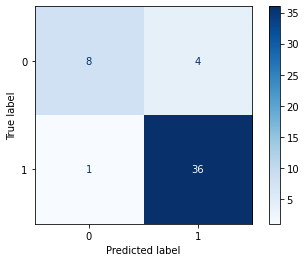

In [11]:
plot_confusion_matrix(pipe, X_test, y_test, cmap = 'Blues');

# KNN Optimized

Plot error rate versus n_neighbors to determine optimum number of n_neighbors

Minimum error:- 0.04081632653061224 at K = 1


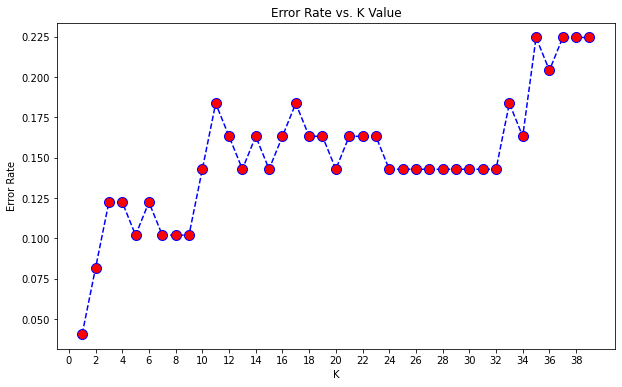

In [12]:
error_rate = []
for i in range (1,40):
  knn1 = KNeighborsClassifier(n_neighbors = i)
  pipe_knn1 = make_pipeline(col_transformer, knn1)

  pipe_knn1.fit(X_train, y_train)
  pred_i = pipe_knn1.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = 'dashed', 
          marker = 'o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K') 
plt.xticks(np.arange(0,40, step = 2))
plt.ylabel('Error Rate')
print('Minimum error:-', min(error_rate),"at K =", error_rate.index(min(error_rate))+1)

Plot accuracy versus n_neighbors to determine optimum number of n_neighbors

Maximum accuracy:- 0.9591836734693877 at K = 1


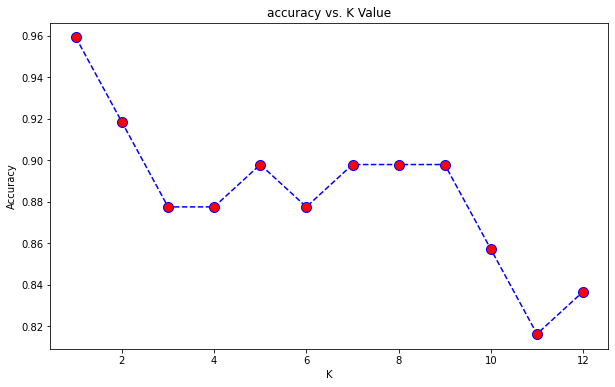

In [13]:
acc = [] #source: https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb
from sklearn import metrics #finding maximum accuracy
for i in range(1,13):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    pipe_knn1 = make_pipeline(scaler,knn1)
    pipe_knn1.fit(X_train,y_train)    
    yhat = pipe_knn1.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,13),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",(acc.index(max(acc))+1))

Based on lowest error rate and highest accuracy occuring at a K value of 1, K (n_neighbors) is chosen as 1 for the optimized KNN model below.

In [ ]:
knn_1 = KNeighborsClassifier(n_neighbors = 1)

pipe_knn_1 = make_pipeline(col_transformer, knn_1)

In [ ]:
pipe_knn_1.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f348c09c390>)])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

In [ ]:
y_pred_knn_1 = pipe_knn_1.predict(X_test)
y_pred_knn_1_train = pipe_knn_1.predict(X_train)

In [ ]:
knn_n1_train_accuracy = accuracy_score(y_train, y_pred_knn_1_train)
print(f'KNN with n_neighbors = 1 Train Accuracy: {knn_n1_train_accuracy}')

KNN with n_neighbors = 1 Train Accuracy: 1.0


In [ ]:
knn_n1_test_accuracy = accuracy_score(y_test, y_pred_knn_1)
print(f'KNN with n_neighbors = 1 Test Accuracy: {knn_n1_test_accuracy}')

KNN with n_neighbors = 1 Test Accuracy: 0.9591836734693877


In [ ]:
class_report_knn_1 = classification_report(y_test, y_pred_knn_1)
print(class_report_knn_1)

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.95      1.00      0.97        37

    accuracy                           0.96        49
   macro avg       0.97      0.92      0.94        49
weighted avg       0.96      0.96      0.96        49



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


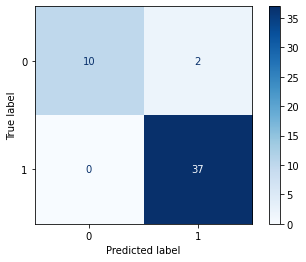

In [ ]:
plot_confusion_matrix(pipe_knn_1, X_test, y_test, cmap = 'Blues');

# eXtreme Gradient Boosting Machine - Base Model

In [14]:
xgb = XGBClassifier()

In [15]:
pipe_xgb = make_pipeline(scaler, xgb)
pipe_xgb.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier', XGBClassifier())])

In [16]:
y_pred_xgb = pipe_xgb.predict(X_test)
y_pred_xgb_train = pipe_xgb.predict(X_train)

In [17]:
xgb_train_accuracy = accuracy_score(y_train, y_pred_xgb_train)
print(f'Extreme Gradient Boosting Train Accuracy: {xgb_train_accuracy}')

Extreme Gradient Boosting Train Accuracy: 1.0


In [18]:
xgb_test_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'Extreme Gradient Boosting Test Accuracy: {xgb_test_accuracy}')

Extreme Gradient Boosting Test Accuracy: 0.9183673469387755


In [19]:
class_report_xgb = classification_report(y_test, y_pred_xgb)
print(class_report_xgb)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.92      0.97      0.95        37

    accuracy                           0.92        49
   macro avg       0.91      0.86      0.88        49
weighted avg       0.92      0.92      0.92        49



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


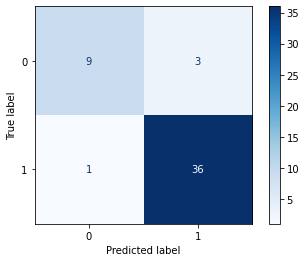

In [20]:
plot_confusion_matrix(pipe_xgb, X_test, y_test, cmap = 'Blues');

# eXtreme Gradient Boosting Machine - Optimized

In [ ]:
pipe_xgb.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier', XGBClassifier())])>

Choosing a range of hyperparameters to find values that optimize the model:

In [ ]:
params = {
    'xgbclassifier__n_estimators': [50, 100, 150, 200],
    'xgbclassifier__learning_rate': [0.05, 0.1, 0.3, 0.5, 0.7],
    'xgbclassifier__max_depth': [2, 3, 5, 10, 15]}

In [ ]:
xgb_gridsearch = GridSearchCV(pipe_xgb, params, cv = 2, refit = True)

In [ ]:
xgb_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('xgbclassifier', XGBClassifier())]),
             param_grid={'xgbclassifier__learning_rate': [0.05, 0.1, 0.3, 0.5,
                                                          0.7],
                         'xgbclassifier__max_depth': [2, 3, 5, 10, 15],
                         'xgbclassifier__n_estimators': [50, 100, 150, 200]})

The best parameters chosen for the model:

In [ ]:
print(xgb_gridsearch.best_params_)

{'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 50}


In [ ]:
optimized_xgb_model = xgb_gridsearch.best_estimator_
optimized_xgb_model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(learning_rate=0.05, n_estimators=50))])

In [ ]:
y_pred_opt_xgb_test = optimized_xgb_model.predict(X_test)
y_pred_opt_xgb_train = optimized_xgb_model.predict(X_train)

In [ ]:
xgb_opt_train_accuracy = accuracy_score(y_train, y_pred_opt_xgb_train)
print(f'Extreme Gradient Boosting Optimized Train Accuracy: {xgb_opt_train_accuracy}')

Extreme Gradient Boosting Optimized Train Accuracy: 0.9931506849315068


In [ ]:
xgb_opt_test_accuracy = accuracy_score(y_test, y_pred_opt_xgb_test)
print(f'Extreme Gradient Boosting Optimized Train Accuracy: {xgb_opt_test_accuracy}')

Extreme Gradient Boosting Optimized Train Accuracy: 0.9183673469387755


In [ ]:
class_report_opt_xgb = classification_report(y_test, y_pred_opt_xgb_test)
print(class_report_opt_xgb)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.92      0.97      0.95        37

    accuracy                           0.92        49
   macro avg       0.91      0.86      0.88        49
weighted avg       0.92      0.92      0.92        49



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


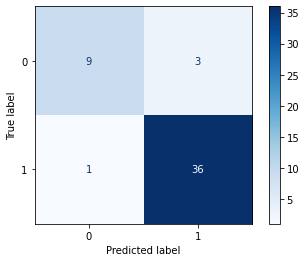

In [ ]:
plot_confusion_matrix(optimized_xgb_model, X_test, y_test, cmap = 'Blues');

# Light Gradient Boosting Machine - Base Model

In [ ]:
lgb = LGBMClassifier()

In [ ]:
pipe_lgb = make_pipeline(col_transformer, lgb)

In [ ]:
pipe_lgb.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f348c09c390>)])),
                ('lgbmclassifier', LGBMClassifier())])

In [ ]:
y_pred_lgb = pipe_lgb.predict(X_test)
y_pred_lgb_train = pipe_lgb.predict(X_train)

In [ ]:
lgb_train_accuracy = accuracy_score(y_train, y_pred_lgb_train)
print(f'Light Gradient Boosting Train Accuracy: {lgb_train_accuracy}')

Light Gradient Boosting Train Accuracy: 1.0


In [ ]:
lgb_test_accuracy = accuracy_score(y_test, y_pred_lgb)
print(f'Light Gradient Boosting Test Accuracy: {lgb_test_accuracy}')

Light Gradient Boosting Test Accuracy: 0.9387755102040817


In [ ]:
class_report_lgb = classification_report(y_test, y_pred_lgb)
print(class_report_lgb)

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.95      0.97      0.96        37

    accuracy                           0.94        49
   macro avg       0.93      0.90      0.91        49
weighted avg       0.94      0.94      0.94        49



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


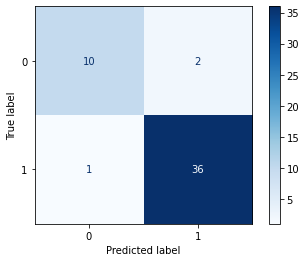

In [ ]:
plot_confusion_matrix(pipe_lgb, X_test, y_test, cmap = 'Blues');

# Light Gradient Boosting Machine - Optimized

In [ ]:
pipe_lgb.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f348c09c390>)])),
                ('lgbmclassifier', LGBMClassifier())])>

Choosing hyperparamaeters to tune for the model:

In [ ]:
params1 = {'lgbmclassifier__max_depth': (2, 4, 6, 10),
          'lgbmclassifier__num_leaves': (3, 10, 15),
          'lgbmclassifier__min_data_in_leaf': (5, 10, 15)}

In [ ]:
gridsearch_lgb = GridSearchCV(pipe_lgb, params1, cv = 5)

In [ ]:
gridsearch_lgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f348c09c390>)])),
                                       ('lgbmclassifier', LGBMClassifier())]),
             param_grid={'lgbmclassifier__max_depth': (2, 4, 6, 10),
                         'lgbmclassifier__min_data_in_leaf': (5, 10, 15),
                         'lgbmclassifier__num_leaves': (3, 10, 15)})

Best parameters chosen from gridsearch to optimize model:

In [ ]:
print(gridsearch_lgb.best_params_)

{'lgbmclassifier__max_depth': 4, 'lgbmclassifier__min_data_in_leaf': 5, 'lgbmclassifier__num_leaves': 15}


Adjust hyperparameter ranges on next gridsearch.  Keeping flexibility in the ranges to account for changes when multiple hyperparameters are adjusted:

In [ ]:
params2 = {'lgbmclassifier__max_depth': range(5,9),
          'lgbmclassifier__num_leaves': range(4,14),
          'lgbmclassifier__min_data_in_leaf': range(1,4)}

In [ ]:
gridsearch_lgb_2nd = GridSearchCV(pipe_lgb, params2, cv = 5)

In [ ]:
gridsearch_lgb_2nd.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f348c09c390>)])),
                                       ('lgbmclassifier', LGBMClassifier())]),
             param_grid={'lgbmclassifier__max_depth': range(5, 9),
                         'lgbmclassifier__min_data_in_leaf': range(1, 4),
                         'lgbmclassifier__num_leaves': range(4, 14)})

Best hyperparameters for final model:

In [ ]:
print(gridsearch_lgb_2nd.best_params_)

{'lgbmclassifier__max_depth': 6, 'lgbmclassifier__min_data_in_leaf': 3, 'lgbmclassifier__num_leaves': 13}


In [ ]:
lgb_best_model = gridsearch_lgb_2nd.best_estimator_

In [ ]:
y_pred_lgb_best = lgb_best_model.predict(X_test)

In [ ]:
y_pred_lgb_best_train = lgb_best_model.predict(X_train)

In [ ]:
lgb_best_train_accuracy = accuracy_score(y_train, y_pred_lgb_best_train)
print(f'Light Gradient Boosting Train Accuracy: {lgb_best_train_accuracy}')

Light Gradient Boosting Train Accuracy: 1.0


In [ ]:
lgb_best_test_accuracy = accuracy_score(y_test, y_pred_lgb_best)
print(f'Light Gradient Boosting Test Accuracy: {lgb_best_test_accuracy}')

Light Gradient Boosting Test Accuracy: 0.9183673469387755


In [ ]:
class_report_lgb_best = classification_report(y_test, y_pred_lgb_best)
print(class_report_lgb_best)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.92      0.97      0.95        37

    accuracy                           0.92        49
   macro avg       0.91      0.86      0.88        49
weighted avg       0.92      0.92      0.92        49



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


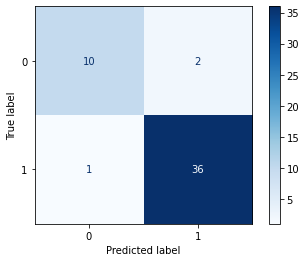

In [ ]:
plot_confusion_matrix(pipe_lgb, X_test, y_test, cmap = 'Blues');